# TPE_2_inf3236: GENERATE DATASETS IN PYTHON

# **GENERATE DATASETS IN PYTHON**

**Creation des donnees meteorologiques artificielles pour certaines villes en Allemagne.**

In [ ]:
# importation des bibliotheques
import numpy as np
import pandas as pd

In [ ]:
# generer un jeu de donnees avec des informations entrees manuellement ou aleatoirement 
cities = ['Berlin', 'Frankfurt', 'Hamburg', 'Nuremberg', 'Munich', 'Stuttgart','Hanover', 'Saarbruecken', 
          'Cologne','Constance', 'Freiburg', 'Karlsruhe']

n = len(cities)
data = {'Temperature': np.random.normal(24, 3, n),'Humidity': np.random.normal(78, 2.5, n),
        'Wind': np.random.normal(15, 4, n)}
df = pd.DataFrame(data=data, index=cities)
df

,Temperature,Humidity,Wind
Berlin,20.058630,78.653368,21.110742
Frankfurt,23.885830,76.957409,4.666958
Hamburg,25.454613,78.071872,11.618789
Nuremberg,20.492401,76.647729,18.871855
Munich,27.526491,73.919705,6.543290
Stuttgart,20.056518,76.831643,17.469537
Hanover,28.718129,82.648295,16.868510
Saarbruecken,21.512293,75.259044,9.643960
Cologne,23.940894,78.234977,21.263098
Constance,28.670592,78.248496,11.730637


#### Creation de donnees artificielle pour quatre(04) types de fleurs qui n'existent pas.

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Cette fonction retourne une variable de type scipy.stats._distn_infrastructure.rv_frozen
def truncated_normal(mean=0, sd=1, low=0, upp=10, type=int):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [ ]:
# Cette fonction retourne une liste(numpy.ndarray) de 100(valeur par defaut, donc peut etre modifiee) elements(reels) aleatoires
def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
  res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
  return res.rvs(num)

In [ ]:
# Cette fonction retourne une liste(numpy.ndarray) de 100(valeur par defaut, donc peut etre modifiee) elements(entiers) aleattoiress
def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
  res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
  return res.rvs(num).astype(np.uint8)

In [ ]:
# nombre d'items par classe:
number_of_items_per_class = [190, 205, 230, 170]
flowers = {}

In [ ]:
# flos pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256, num=number_of_items)

greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127, num=number_of_items)

blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20, num=number_of_items)

calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2, num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data

In [ ]:
# flos Java:
number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256, num=number_of_items)

greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127, num=number_of_items)

blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20, num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5, num=number_of_items)

data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data

In [ ]:
# flos margarita:
number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238, num=number_of_items)

greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120, num=number_of_items)

blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12, num=number_of_items)

calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4, num=number_of_items)

data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data

In [ ]:
# flos artificialis:
number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255, num=number_of_items)

greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255, num=number_of_items)

blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112, num=number_of_items)

calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5, num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data

data = np.concatenate((flowers["flos_pythonem"], flowers["flos_java"], flowers["flos_margarita"],
                       flowers["flos_artificialis"]), axis=0)

In [ ]:
# attribue une etiquette a chaque jeu de donnees 
target = np.zeros(sum(number_of_items_per_class)) # 4 flowers
previous_end = 0
for i in range(1, 5):
  num = number_of_items_per_class[i-1]
  beg = previous_end
  target[beg: beg + num] += i
  previous_end = beg + num

conc_data = np.concatenate((data, target.reshape(target.shape[0],1)), axis=1)
np.savetxt("strange_flowers.txt", conc_data, fmt="%2.2f",)

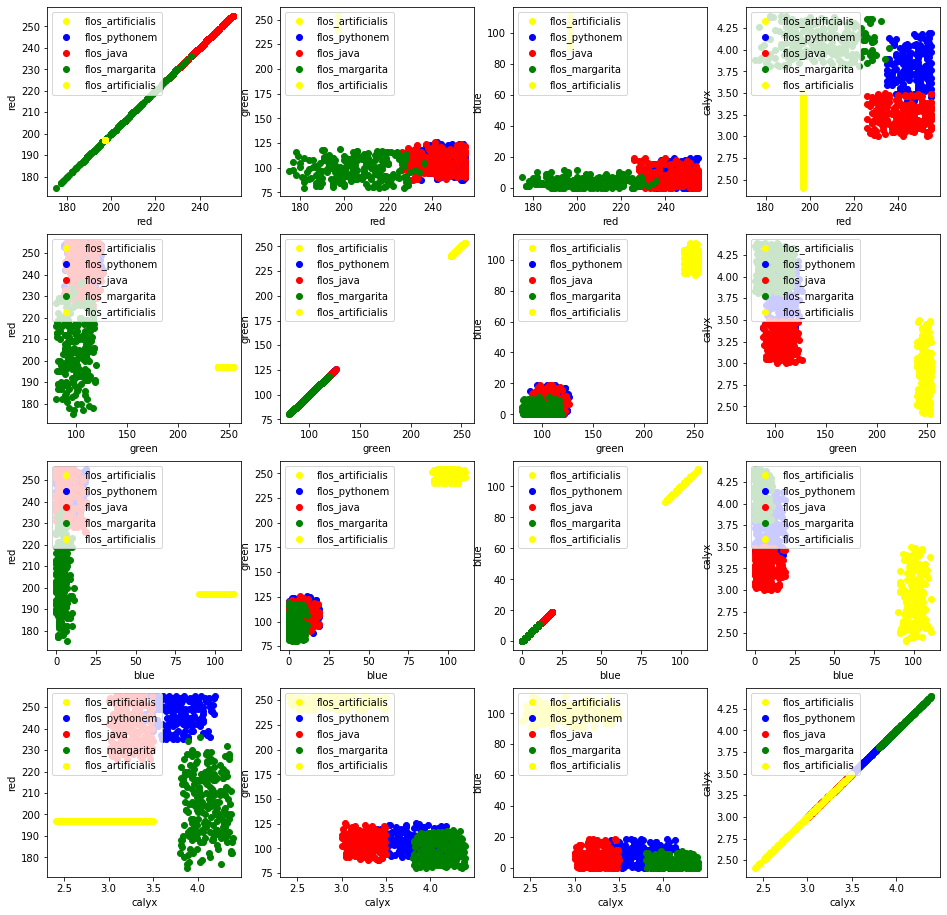

In [ ]:
target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['blue', 'red', 'green', 'yellow']

for x in range(n):
  for y in range(n):
    xname = feature_names[x]
    yname = feature_names[y]
    for color_ind in range(len(target_names)+1):
      ax[x, y].scatter(data[target==color_ind, x], data[target==color_ind, y], label=target_names[color_ind-1],
                       c=colors[color_ind-1])
      
    ax[x, y].set_xlabel(xname)
    ax[x, y].set_ylabel(yname)
    ax[x, y].legend(loc='upper left')

plt.show()

#### GENERER LES JEUX DE DONNEES SYNTHETIQUE AVEC SCIKIT-LEARN

In [ ]:
from numpy.random.mtrand import random_integers
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

data,labels = make_blobs(n_samples=1000, centers=np.array([[2, 3], [4, 5], [7,9]]),random_state=1)

labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:10]
np.savetxt("squirrels.txt", all_data)
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

In [ ]:
# le code suivant permet de visualiser la difference entre le remodelage et la concatenation
a = np.array([[1, 2], [3, 4]])
b = np.array( [5, 6])
b = b.reshape((b.shape[0], 1))
print(b)
x = np.concatenate( (a, b), axis=1)
x

[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

#### Lecture des donnees et reconversion en  'donnees' AND 'etiquette'

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

data, labels = make_blobs(n_samples=1000,centers=np.array([[2, 3], [4, 5], [7,9]]),random_state=1)
#centers=n_classes,
labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:10]
np.savetxt("squirrels.txt", all_data)
all_data[:10]


array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

In [ ]:
file_data = np.loadtxt("squirrels.txt")

data = file_data[:,:-1]
labels = file_data[:,2:]

labels = labels.reshape((labels.shape[0]))

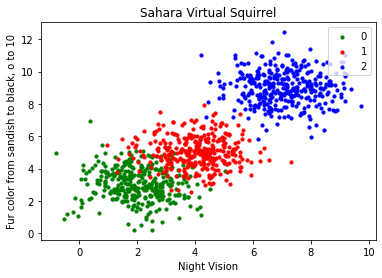

In [ ]:
# visualiser la distribution du jeu de donnees 
import matplotlib.pyplot as plt

colours = ("green", "red", "blue", "magenta", "yellow", "cyan")
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
  ax.scatter(data[labels==n_class, 0], data[labels==n_class,1], c=colours[n_class], s=10, label=str(n_class))
  
  ax.set(xlabel='Night Vision', ylabel = 'Fur color from sandish to black, o to 10', title='Sahara Virtual Squirrel')
  
  ax.legend(loc='upper right')

#### Entrainons notre modele d'apprentissage

In [ ]:
from sklearn.model_selection import train_test_split

data_sets = train_test_split(data, labels, train_size=0.8, test_size=0.2,
                             random_state=42 # garanti que a chaque execution on a le meme resultat
                            )
train_data, test_data, train_labels, test_labels = data_sets

In [ ]:
# importation du modele
from sklearn.neighbors import KNeighborsClassifier

# creation du classifieur KNN
knn = KNeighborsClassifier(n_neighbors=8)

# Entrainement
knn.fit(train_data, train_labels)

# test sur les donnees de test:
calculated_labels = knn.predict(test_data)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))

Accuracy: 0.97


#### Autres distributions interessantes 

In [ ]:
import numpy as np
import sklearn.datasets as ds
data, labels = ds.make_moons(n_samples=150, shuffle=True, noise=0.19, random_state=None)

data += np.array(-np.ndarray.min(data[:,0]),-np.ndarray.min(data[:,1]))

np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])

(0.0, 0.6017505235794585)

[Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'), Text(0.5, 1.0, 'Moons')]

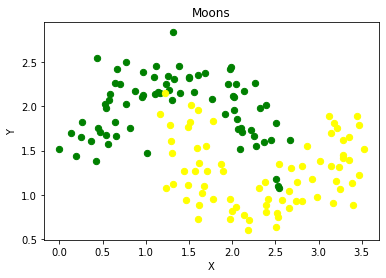

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0, 1], c='green', s=40, label='greens')

ax.scatter(data[labels==1, 0], data[labels==1, 1], c='yellow', s=40, label='yellows')

ax.set(xlabel='X', ylabel='Y', title='Moons')

In [ ]:
min_x_new, max_x_new = 33, 88
min_y_new, max_y_new = 12, 20

data, labels = ds.make_moons(n_samples=100, shuffle=True, noise=0.05, random_state=42) # none = differentes valeurs

min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])

data -= np.array([min_x, min_y])
data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), (max_y_new - min_y_new) / (max_y - min_y)])
data += np.array([min_x_new, min_y_new])

data[:6]

array([[78.0469871 , 12.72162316],
       [52.20447002, 16.54564562],
       [63.92313864, 12.58171328],
       [34.13562936, 15.92368668],
       [36.47492762, 15.97729737],
       [38.56046274, 18.07826951]])

In [ ]:
def scale_data(data, new_limits, inplace=False ):
      if not inplace:
        data = data.copy()
      min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
      max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])
      min_x_new, max_x_new = new_limits[0]
      min_y_new, max_y_new = new_limits[1]
      data -= np.array([min_x, min_y])
      data *= np.array([(max_x_new - min_x_new) / (max_x - min_x),(max_y_new - min_y_new) / (max_y - min_y)])
      data += np.array([min_x_new, min_y_new])
      if inplace:
        return None
      else:
        return data

data, labels = ds.make_moons(n_samples=100, shuffle=True, noise=0.05, random_state=None)

scale_data(data, [(1, 4), (3, 8)], inplace=True)
data[:10]

array([[2.4750809 , 7.27911114],
       [3.45346147, 3.4268091 ],
       [2.05195225, 6.00577289],
       [3.88807581, 5.53631056],
       [4.        , 5.77839984],
       [2.24994868, 4.25211317],
       [2.93488205, 5.53150599],
       [3.29191421, 3.41352911],
       [3.98577355, 6.22194268],
       [1.13549207, 5.0385213 ]])

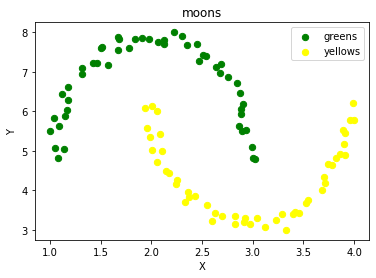

In [ ]:
# visualisation du resultat 
fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0, 1], c='green', s=40, label='greens')

ax.scatter(data[labels==1, 0], data[labels==1, 1], c='yellow', s=40, label='yellows')

ax.set(xlabel='X', ylabel='Y', title='moons')

ax.legend(loc='upper right');

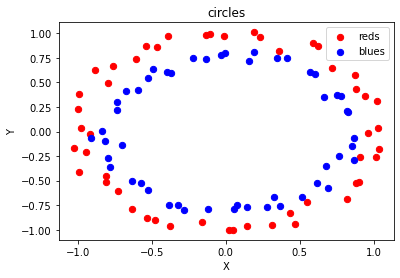

In [ ]:
# afficher le resultat sous forme circulaire 
import sklearn.datasets as ds

data, labels = ds.make_circles(n_samples=100, shuffle=True, noise = 0.05, random_state=None)

fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0, 1], c='red', s=40, label='reds')

ax.scatter(data[labels==1, 0], data[labels==1, 1], c='blue', s=40, label='blues')

ax.set(xlabel='X', ylabel='Y', title='circles')

ax.legend(loc='upper right')

Automatically created module for IPython interactive environment


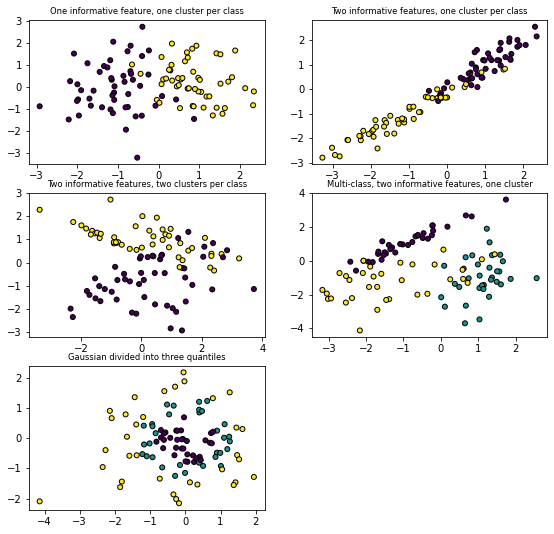

In [ ]:
# cette partie permet de visualiser les differentes configuration qu'on peut avoir avec les classes 
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs # pour pouvoir regrouper en tas 
from sklearn.datasets import make_gaussian_quantiles # pour tracer le meilleur hyperplan  

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,n_clusters_per_class=1)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')

plt.subplot(323)
plt.title("Two informative features, two clusters per class",fontsize='small')
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster", fontsize='small')

X1, Y1 = make_classification(n_features=2,n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

plt.subplot(325)
plt.title("Gaussian divided into three quantiles", fontsize='small')

X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

plt.show()

**EXERCISE 1 :** Créez deux ensembles de tests séparables avec un perceptron sans nœud de biais.


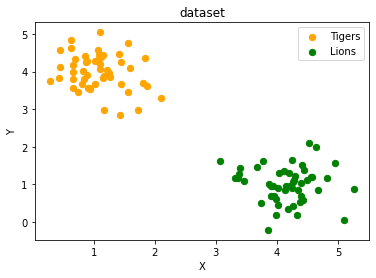

In [ ]:
data, labels = make_blobs(n_samples=100, cluster_std = 0.5, centers=[[1, 4] ,[4, 1]], random_state=1)
fig, ax = plt.subplots()

colours = ["orange", "green"]
label_name = ["Tigers", "Lions"]
for label in range(0, 2):
  ax.scatter(data[labels==label, 0], data[labels==label, 1], c=colours[label], s=40, label=label_name[label])

ax.set(xlabel='X', ylabel='Y', title='dataset')

ax.legend(loc='upper right')

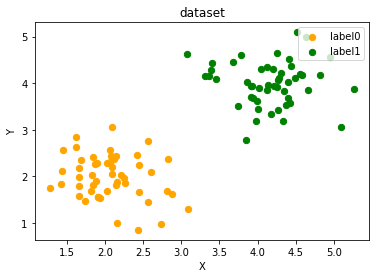

In [ ]:
data, labels = make_blobs(n_samples=100, cluster_std = 0.5, centers=[[2, 2] ,[4, 4]], random_state=1)
fig, ax = plt.subplots()

colours = ["orange", "green"]
label_name = ["label0", "label1"]
for label in range(0, 2):
  ax.scatter(data[labels==label, 0], data[labels==label, 1], c=colours[label], s=40, label=label_name[label])

ax.set(xlabel='X', ylabel='Y', title='dataset')

ax.legend(loc='upper right')

In [ ]:
import sklearn.datasets as ds

data, labels = ds.make_circles(n_samples=100, shuffle=True, noise=0.05, random_state=42)

centers = [[3, 4], [5, 3], [4.5, 6]]
data2, labels2 = make_blobs(n_samples=100, cluster_std = 0.5, centers=centers,random_state=1)
for i in range(len(centers)-1, -1, -1):
  labels2[labels2==0+i] = i+2

print(labels2)
labels = np.concatenate([labels, labels2])
data = data * [1.2, 1.8] + [3, 4]

data = np.concatenate([data, data2], axis=0)

[2 4 4 3 4 4 3 3 2 4 4 2 4 4 3 4 2 4 4 4 4 2 2 4 4 3 2 2 3 2 2 3 2 3 3 3 3
 3 4 3 3 2 3 3 3 2 2 2 2 3 4 4 4 2 4 3 3 2 2 3 4 4 3 3 4 2 4 2 4 3 3 4 2 2
 3 4 4 2 3 2 3 3 4 2 2 2 2 3 2 4 2 2 3 3 4 4 2 2 4 3]


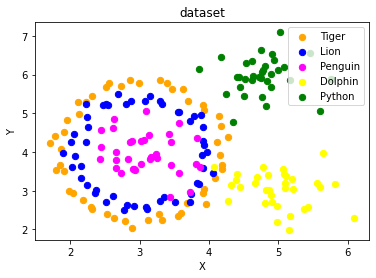

In [ ]:
fig, ax = plt.subplots()

colours = ["orange", "blue", "magenta", "yellow", "green"]
label_name = ["Tiger", "Lion", "Penguin", "Dolphin", "Python"]
for label in range(0, len(centers)+2):
  ax.scatter(data[labels==label, 0], data[labels==label, 1], c=colours[label], s=40, label=label_name[label])
  
ax.set(xlabel='X', ylabel='Y', title='dataset')

ax.legend(loc='upper right')